<a href="https://colab.research.google.com/github/delafarahita/PCVK_Ganjil_2024/blob/main/Dela_Farahita_Zain_Modul_3_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRAKTIKUM**

2. Access the image folder on your Google Drive with the following code:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Transformasi Linier Brightness
Formula: g(x,y)=f(x,y)+b \
g(x,y) adalah nilai pixel asli, b adalah nilai brightness

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


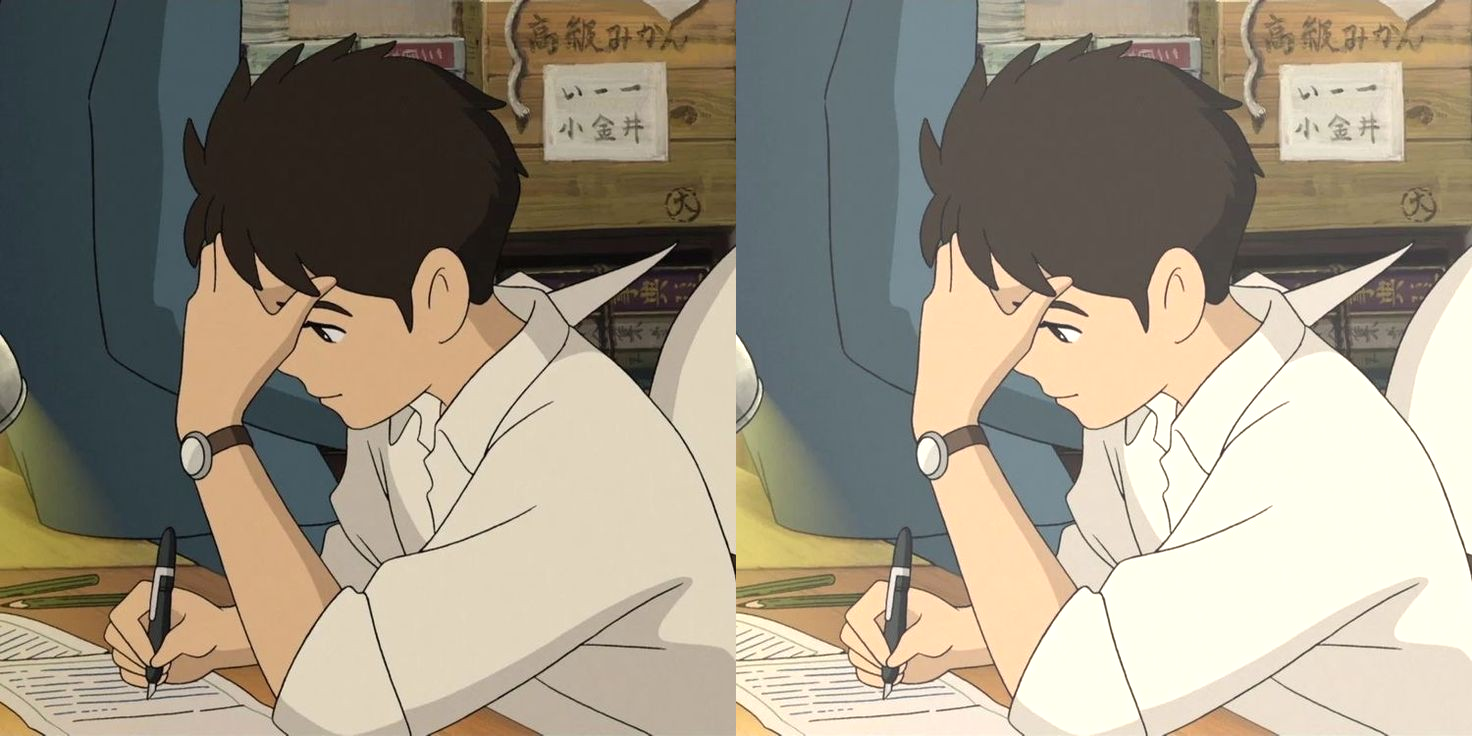

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul3/poppy_hill.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# Cara simpel tanpa for-loop
# brightness_image = cv2.convertScaleAbs(original, beta=brightness)

# Gabungkan citra asli dan hasil citra dengan kecerahan baru
final_frame = cv2.hconcat([original, brightness_image])
cv2_imshow(final_frame)


# **TUGAS PRAKTIKUM**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut

Mengubah citra menjadi inverse
--------------------------------


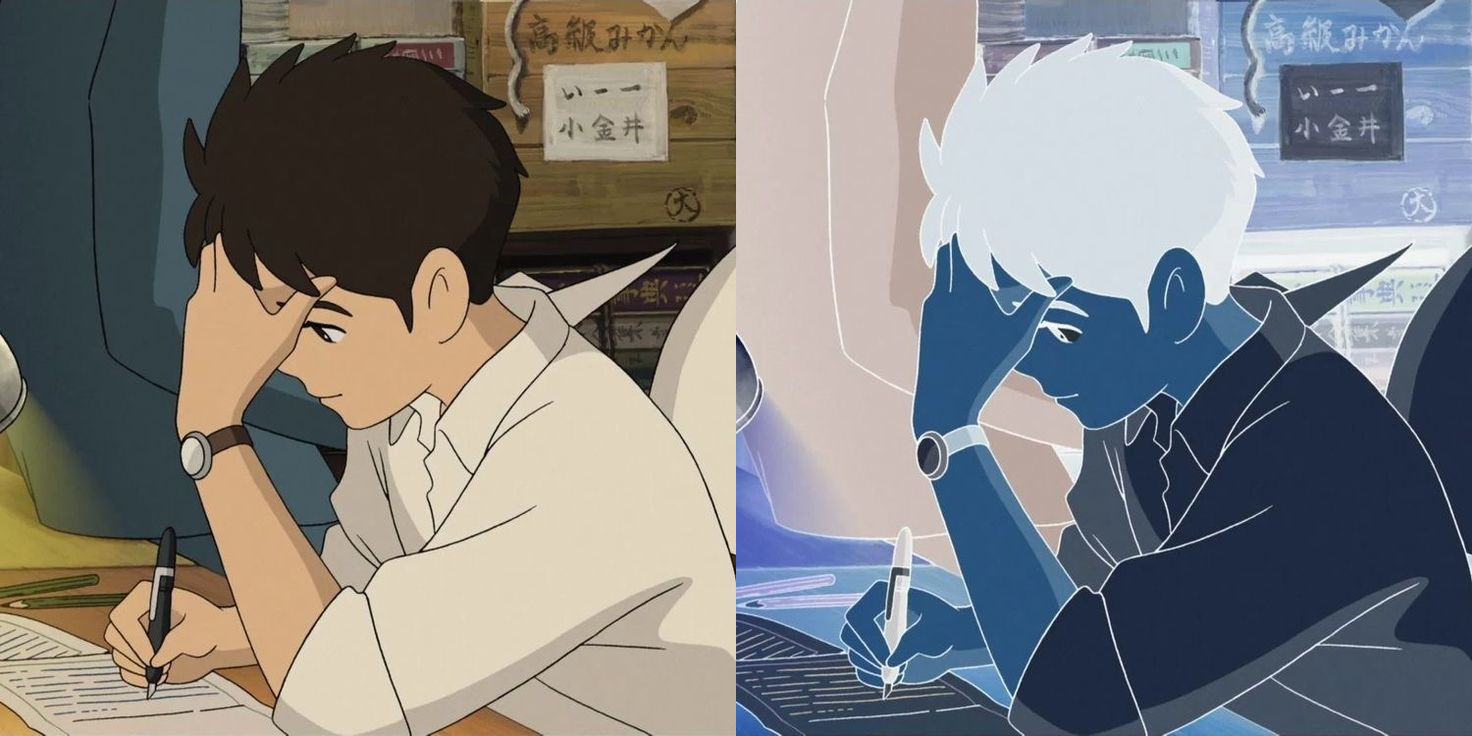

In [11]:
print('Mengubah citra menjadi inverse')
print('--------------------------------')

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul3/poppy_hill.jpg')

# Inversi warna dengan rumus 255 - pixel_value
inverse_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            inverse_image[y, x, c] = 255 - original[y, x, c]

# Menampilkan citra asli dan hasil inverse secara bersamaan
final_frame = cv.hconcat([original, inverse_image])
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut

Mengubah kontras dan kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255 hingga 255]: 50
Masukkan kontras [1.0 hingga 3.0]: 2


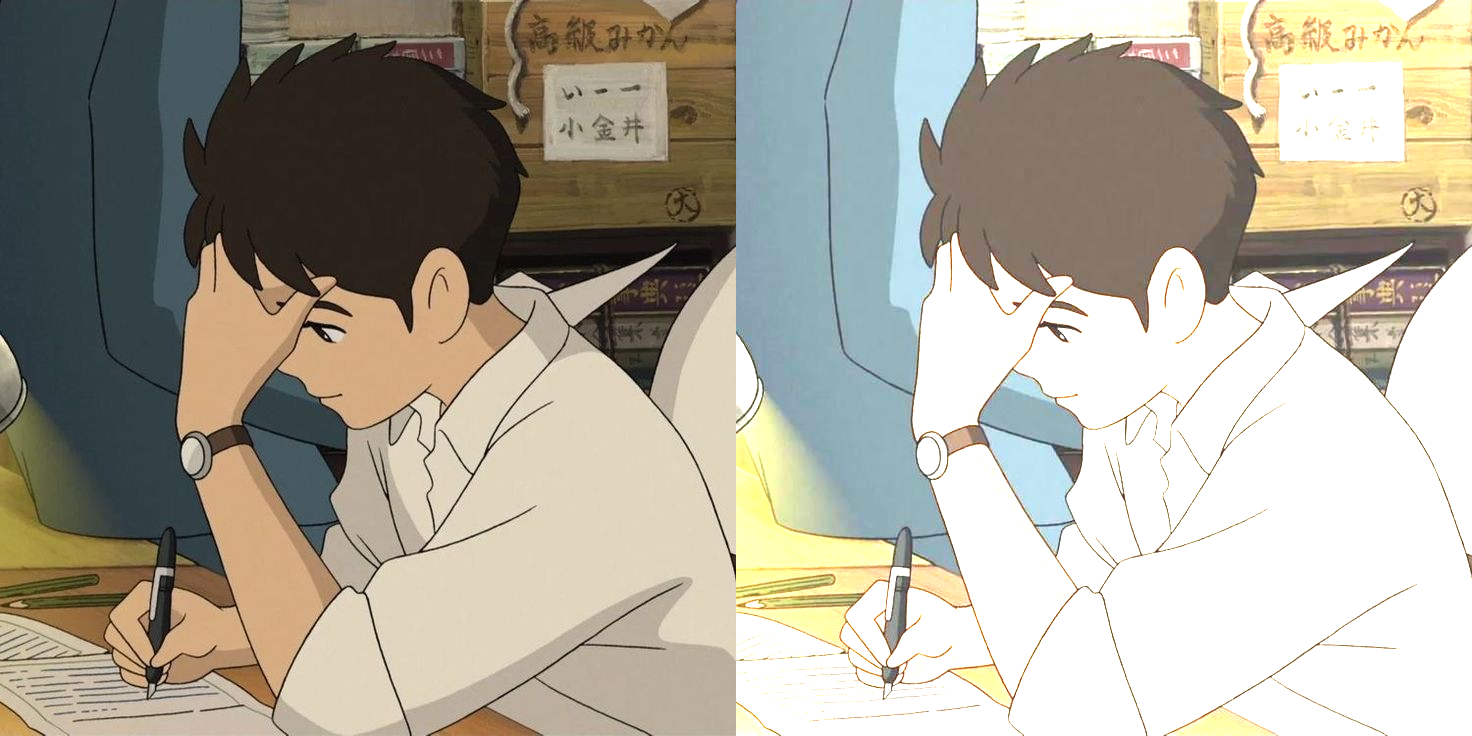

In [15]:
print('Mengubah kontras dan kecerahan citra')
print('--------------------------------')

# Input untuk kecerahan dan kontras
try:
    brightness = float(input('Masukkan tingkat kecerahan [-255 hingga 255]: '))
except ValueError:
    print('Error, not a number')

try:
    contrast = float(input('Masukkan kontras [1.0 hingga 3.0]: '))
except ValueError:
    print('Error, not a number')

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul3/poppy_hill.jpg')
adjusted_image = np.zeros(original.shape, original.dtype)

# Transformasi kecerahan dan kontras
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      # Kontras dan kecerahan diterapkan
      adjusted_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)

# Menggabungkan citra asli dan hasil transformasi
final_frame = cv.hconcat([original, adjusted_image])
cv2_imshow(final_frame)


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut

Transformasi Logarithmic Brightness pada Citra
--------------------------------------------


<ipython-input-16-326f59c39069>:11: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(1 + original))
<ipython-input-16-326f59c39069>:14: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image, dtype=np.uint8)


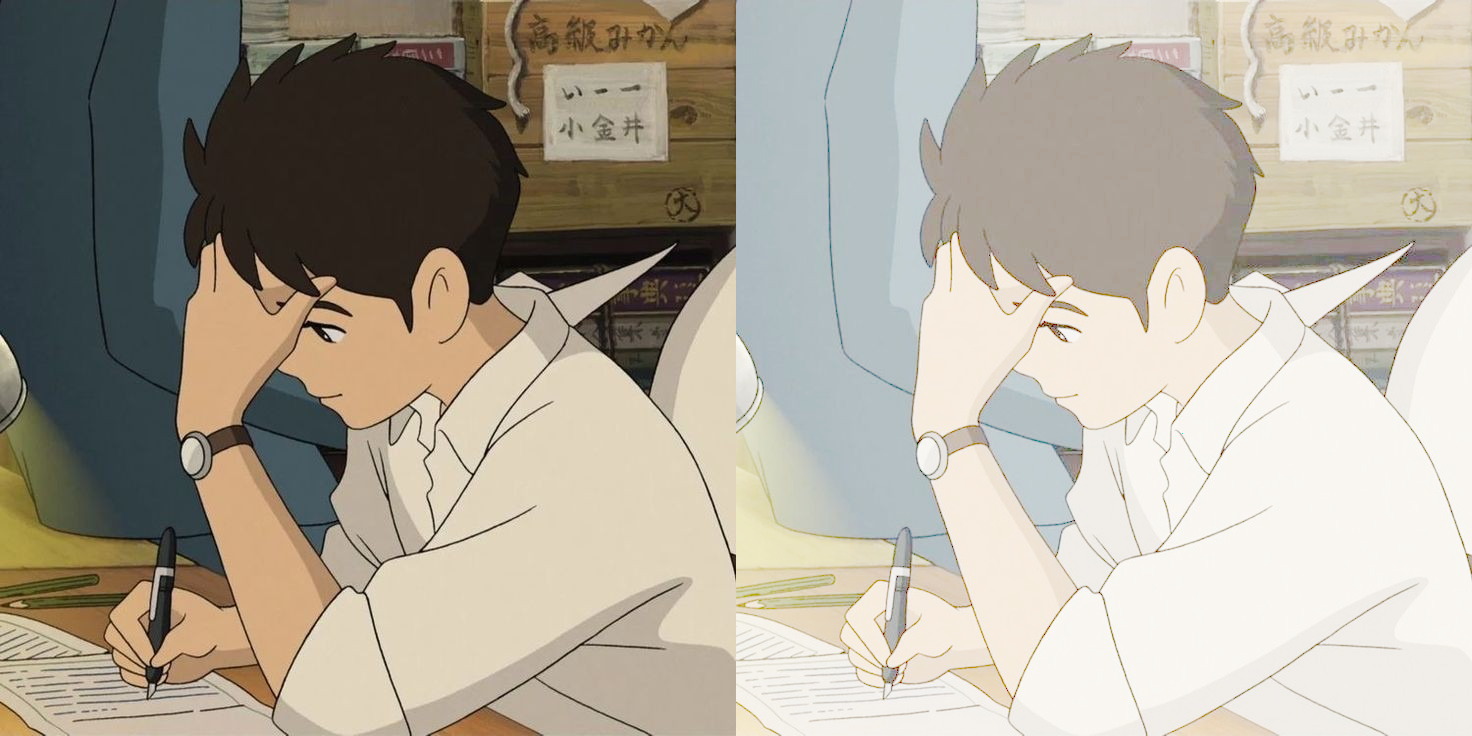

In [16]:
print('Transformasi Logarithmic Brightness pada Citra')
print('--------------------------------------------')

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul3/poppy_hill.jpg')

# Konstanta skala untuk transformasi log
c = 255 / np.log(1 + np.max(original))

# Transformasi logaritmik
log_image = c * (np.log(1 + original))

# Normalisasi hasilnya untuk memastikan rentang nilai tetap 0-255
log_image = np.array(log_image, dtype=np.uint8)

# Gabungkan citra asli dan hasil transformasi log
final_frame = cv.hconcat([original, log_image])
cv2_imshow(final_frame)


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut

a. Averaging

Grayscale dengan metode Averaging
--------------------------------


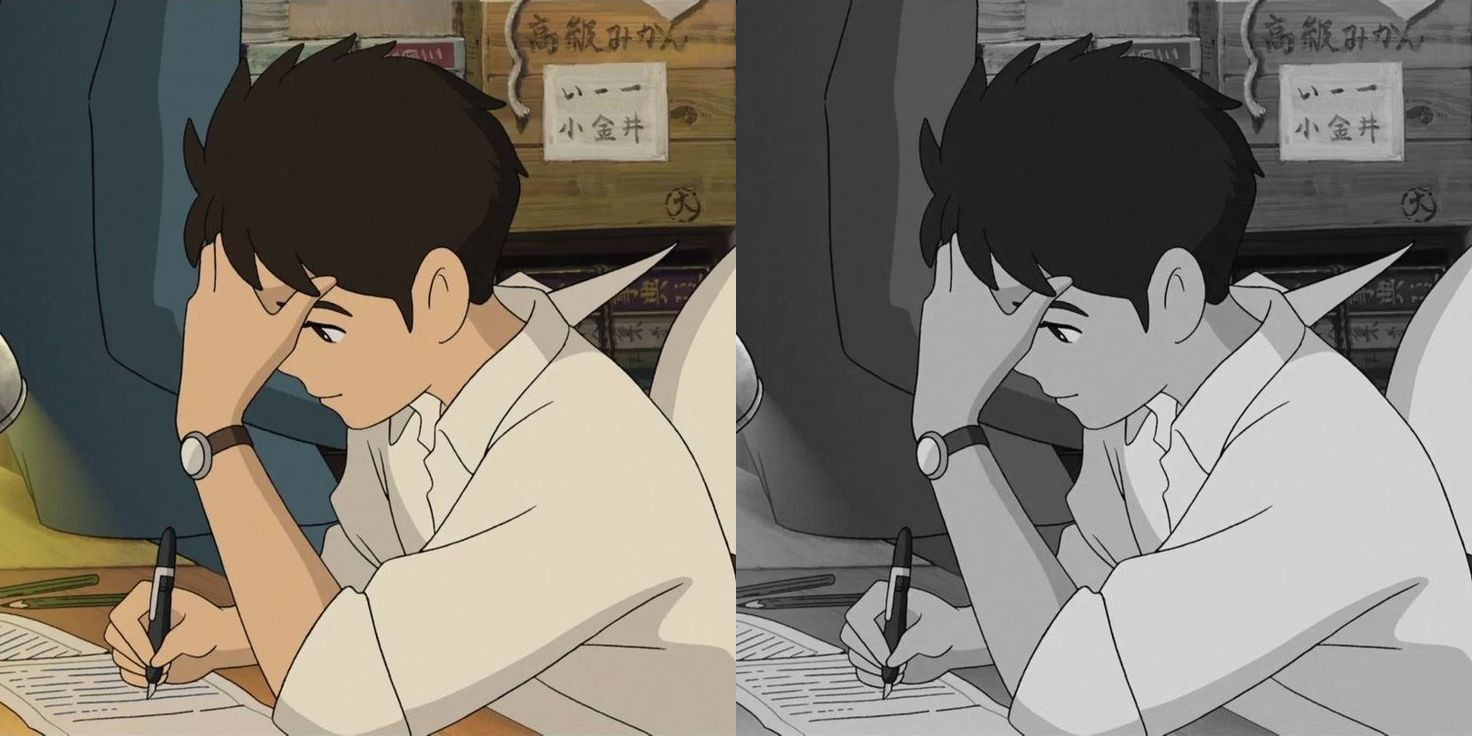

In [24]:
print('Grayscale dengan metode Averaging')
print('--------------------------------')

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul3/poppy_hill.jpg')

# Averaging method
gray_averaging = np.mean(original, axis=2).astype(np.uint8)

# Menampilkan citra asli dan grayscale (Averaging)
final_frame = cv.hconcat([original, cv.cvtColor(gray_averaging, cv.COLOR_GRAY2BGR)])
cv2_imshow(final_frame)

b. Lightness

Grayscale dengan metode Lightness
--------------------------------


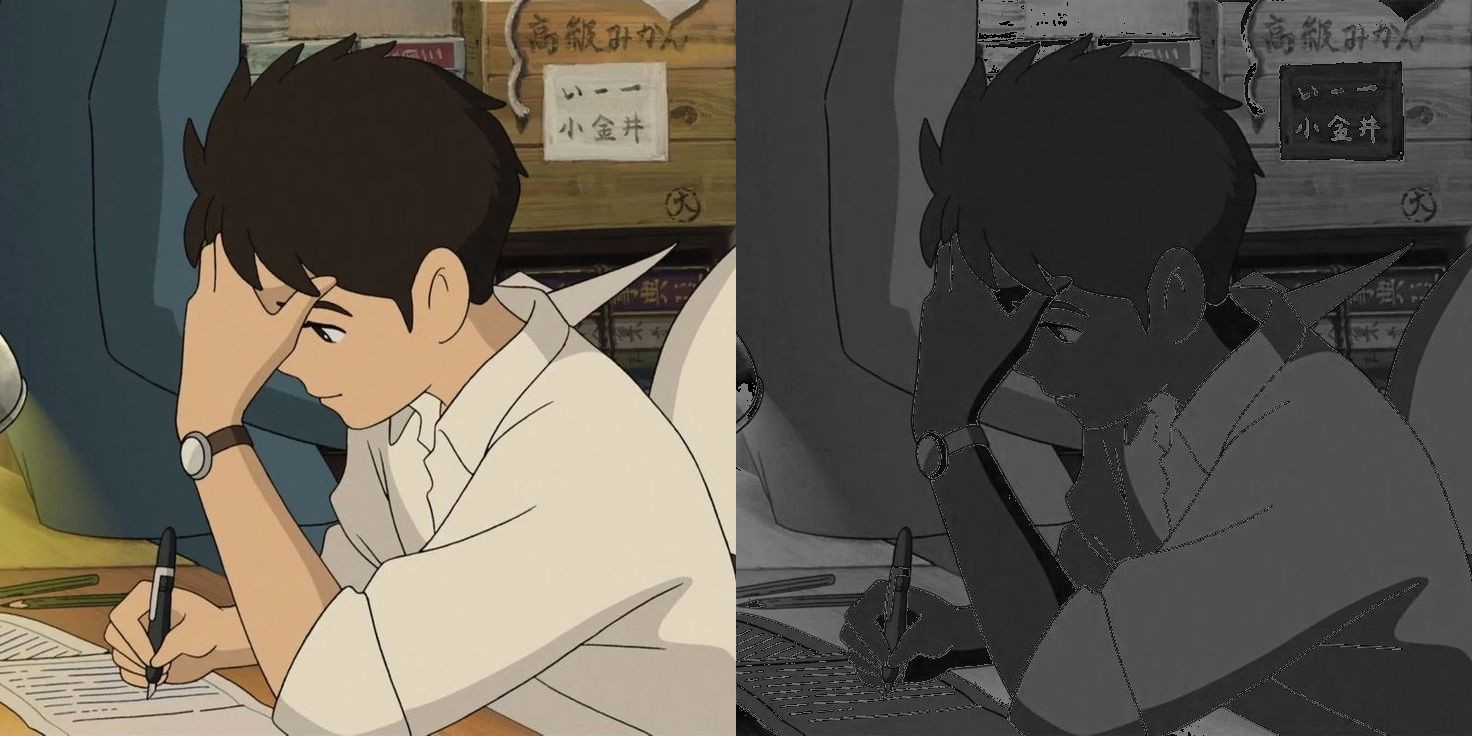

In [25]:
print('Grayscale dengan metode Lightness')
print('--------------------------------')

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul3/poppy_hill.jpg')

# Lightness method
max_rgb = np.max(original, axis=2)
min_rgb = np.min(original, axis=2)
gray_lightness = ((max_rgb + min_rgb) / 2).astype(np.uint8)

# Menampilkan citra asli dan grayscale
final_frame = cv.hconcat([original, cv.cvtColor(gray_lightness, cv.COLOR_GRAY2BGR)])
cv2_imshow(final_frame)

c. Luminance

Grayscale dengan metode Luminance
----------------------------------


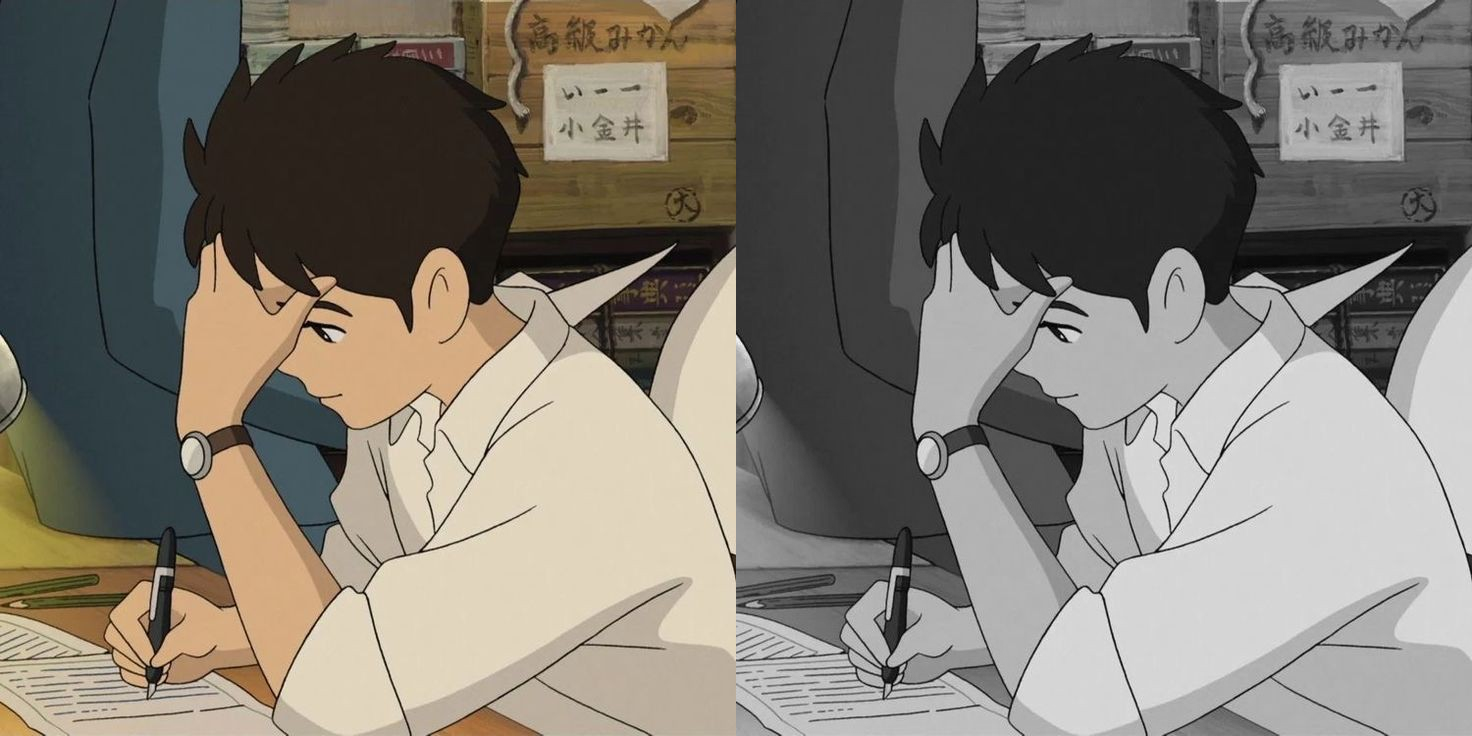

In [27]:
print('Grayscale dengan metode Luminance')
print('----------------------------------')

# Baca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul3/poppy_hill.jpg')

# Luminance method
gray_luminance = (0.2989 * original[:, :, 2] + 0.5870 * original[:, :, 1] + 0.1140 * original[:, :, 0]).astype(np.uint8)

# Menampilkan citra asli dan grayscale
final_frame = cv.hconcat([original, cv.cvtColor(gray_luminance, cv.COLOR_GRAY2BGR)])
cv2_imshow(final_frame)


5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut

Menampilkan warna biru dan mengubah warna lain menjadi grayscale
--------------------------------------------------------


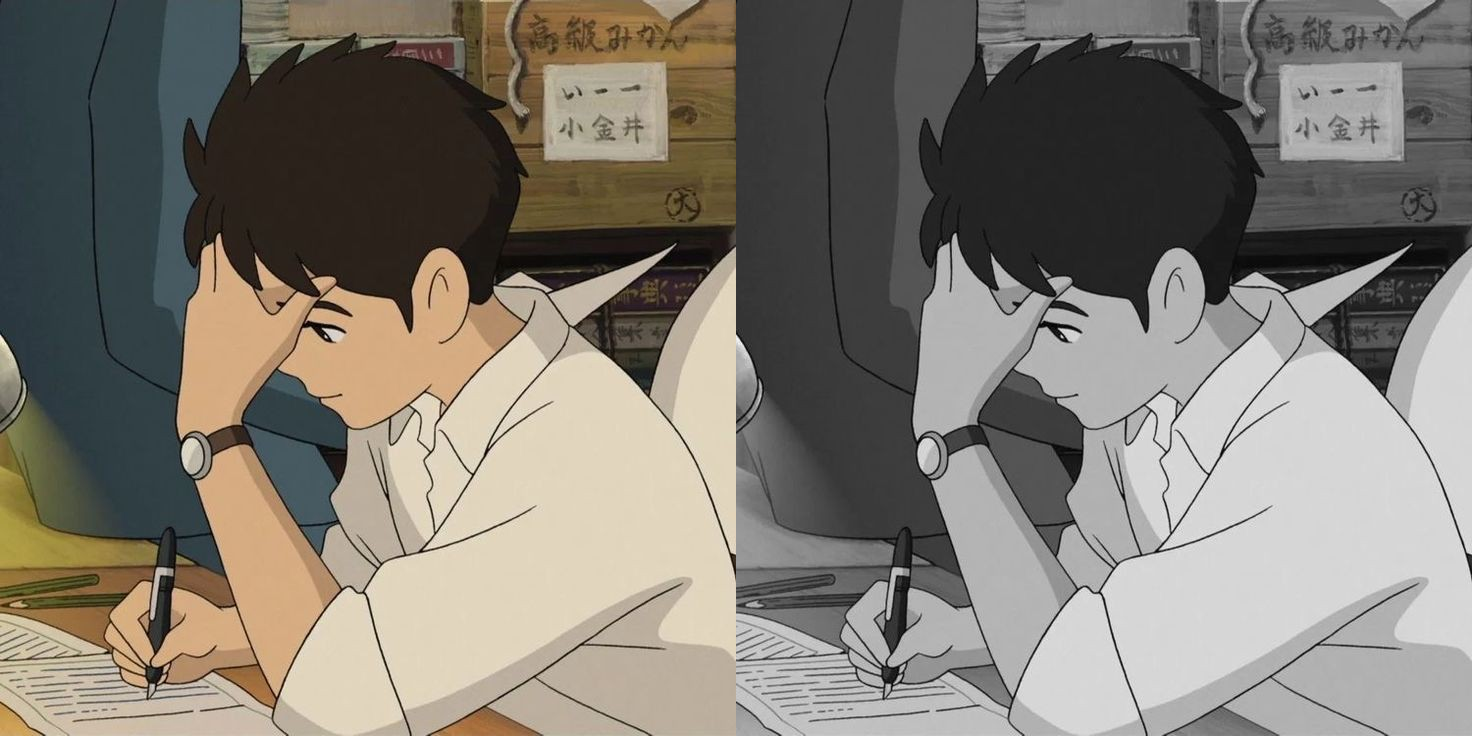

In [30]:
print('Menampilkan warna biru dan mengubah warna lain menjadi grayscale')
print('--------------------------------------------------------')

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul3/poppy_hill.jpg')

# Konversi citra ke ruang warna HSV
hsv_image = cv.cvtColor(original, cv.COLOR_BGR2HSV)

# Rentang warna biru dalam HSV
lower_blue = np.array([100, 150, 50])  # Rentang bawah (Hue, Saturation, Value)
upper_blue = np.array([140, 255, 255])  # Rentang atas (Hue, Saturation, Value)

# Buat masker untuk mendeteksi warna biru
mask_blue = cv.inRange(hsv_image, lower_blue, upper_blue)

# Ambil bagian citra asli yang hanya berwarna biru
blue_only = cv.bitwise_and(original, original, mask=mask_blue)

# Ubah citra asli menjadi grayscale
gray_image = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Konversi grayscale kembali ke BGR agar bisa digabung dengan citra berwarna
gray_bgr = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)

# Buat invers dari masker biru (untuk area selain biru)
mask_not_blue = cv.bitwise_not(mask_blue)

# Ambil bagian citra yang bukan biru dan ubah menjadi grayscale
non_blue_grayscale = cv.bitwise_and(gray_bgr, gray_bgr, mask=mask_not_blue)

# Menampilkan citra yang berwarna biru dan citra grayscale (non-biru)
combined_image = cv.add(blue_only, non_blue_grayscale)
final_image = cv.hconcat([original, combined_image])
cv2_imshow(final_image)